In [ ]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools



In [ ]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [ ]:
# Create dataset
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
print("Train samples dataset: ", train_samples[:-10])
print("Train labels dataset: ",train_labels[:-10])

Train samples dataset:  [36, 77, 42, 86, 22, 89, 26, 88, 46, 73, 13, 88, 20, 93, 36, 84, 53, 69, 45, 78, 47, 80, 53, 93, 49, 91, 24, 85, 61, 69, 36, 75, 46, 83, 40, 91, 57, 76, 26, 67, 51, 92, 59, 84, 57, 79, 57, 79, 58, 92, 20, 70, 42, 76, 22, 82, 45, 70, 32, 67, 45, 80, 54, 71, 44, 76, 13, 65, 44, 74, 13, 91, 59, 92, 60, 73, 54, 96, 39, 99, 45, 87, 47, 80, 20, 72, 20, 65, 34, 86, 15, 87, 15, 81, 35, 86, 15, 87, 37, 82, 50, 71, 35, 77, 52, 91, 46, 86, 60, 67, 42, 76, 63, 90, 31, 88, 34, 93, 36, 70, 63, 80, 64, 82, 58, 74, 57, 88, 34, 89, 27, 66, 31, 98, 52, 87, 38, 88, 32, 81, 27, 76, 59, 78, 21, 78, 35, 65, 60, 87, 31, 100, 35, 68, 18, 82, 15, 91, 64, 67, 54, 77, 55, 85, 46, 99, 48, 68, 39, 97, 48, 70, 64, 100, 64, 93, 24, 73, 24, 82, 34, 98, 41, 78, 57, 72, 41, 92, 55, 99, 39, 72, 16, 80, 41, 65, 50, 93, 36, 98, 54, 99, 42, 81, 47, 72, 33, 73, 30, 91, 23, 65, 41, 84, 63, 92, 17, 97, 26, 83, 29, 85, 54, 92, 43, 76, 21, 79, 54, 83, 23, 67, 58, 68, 18, 85, 27, 81, 21, 65, 15, 99, 57, 7

In [ ]:
# numpy format
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [ ]:
print("Scaled train samples", scaled_train_samples)

Scaled train samples [[0.09195402]
 [0.55172414]
 [0.62068966]
 ...
 [0.79310345]
 [0.52873563]
 [0.12643678]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(train_samples, train_labels, test_size=0.20, random_state=42)

## Simple Sequential Model


In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    Adam(lr=.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

callback =  [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    trainX,
    trainY,
    validation_split=0.1,
    batch_size=10,
    epochs=20,
    callbacks=[callback],
    shuffle=True,
    verbose=2)

Epoch 1/20
152/152 - 1s - loss: 3.8233 - accuracy: 0.5079 - val_loss: 0.6688 - val_accuracy: 0.5060 - 897ms/epoch - 6ms/step
Epoch 2/20
152/152 - 0s - loss: 0.6574 - accuracy: 0.5026 - val_loss: 0.6490 - val_accuracy: 0.5060 - 304ms/epoch - 2ms/step
Epoch 3/20
152/152 - 0s - loss: 0.6486 - accuracy: 0.5026 - val_loss: 0.6414 - val_accuracy: 0.5060 - 287ms/epoch - 2ms/step
Epoch 4/20
152/152 - 0s - loss: 0.6385 - accuracy: 0.5026 - val_loss: 0.6328 - val_accuracy: 0.5060 - 320ms/epoch - 2ms/step
Epoch 5/20
152/152 - 0s - loss: 0.6310 - accuracy: 0.5026 - val_loss: 0.6239 - val_accuracy: 0.5060 - 286ms/epoch - 2ms/step
Epoch 6/20
152/152 - 0s - loss: 0.6214 - accuracy: 0.5205 - val_loss: 0.6161 - val_accuracy: 0.5179 - 306ms/epoch - 2ms/step
Epoch 7/20
152/152 - 0s - loss: 0.6140 - accuracy: 0.5463 - val_loss: 0.6059 - val_accuracy: 0.5774 - 347ms/epoch - 2ms/step
Epoch 8/20
152/152 - 0s - loss: 0.6038 - accuracy: 0.5886 - val_loss: 0.5966 - val_accuracy: 0.6012 - 272ms/epoch - 2ms/step


# Evaluate

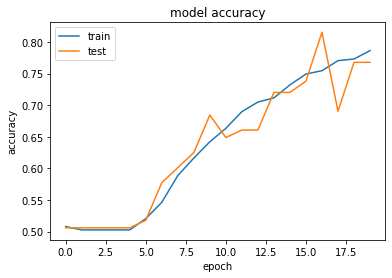

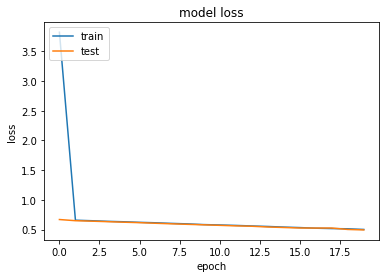

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predIdxs = model.predict(testX)
predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY, predIdxs))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       215
           1       0.67      0.95      0.78       205

    accuracy                           0.74       420
   macro avg       0.79      0.75      0.73       420
weighted avg       0.80      0.74      0.73       420



In [ ]:
cm = confusion_matrix(testY, predIdxs)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Sem normalizacao')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[117  98]
 [ 10 195]]


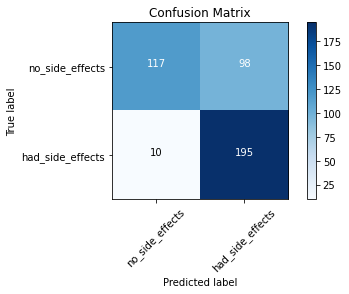

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')